In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('ex2data1.txt', names=range(3)])
df.head()

,Exam1Score,Exam2Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [1]:
X = np.matrix([df[0], df[1]])
y = np.matrix(df[2])

NameError: name 'np' is not defined

In [43]:
def plotData(X, y):
    figure = plt.Figure
    pos = y.index[y==1]
    neg = y.index[y==0]
    plt.scatter(X.iloc[pos, 0], X.iloc[pos, 1], marker='+', label='Admitted')
    plt.scatter(X.iloc[neg, 0], X.iloc[neg, 1], marker='o', color='yellow', label='Not Admitted')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()

In [44]:
def sigmoid(z) :
    return 1/(1 + np.exp(-z.astype(float)))

In [45]:
def costFunction(theta, X, y):
    m, n = X.shape
    theta = np.reshape(theta, (len(theta), 1))
    y = np.reshape(y, (m, 1))
    term1 = np.log(sigmoid(X*theta))
    term2 = np.log(1-sigmoid(X*theta))
    term1 = term1.reshape((m, 1))
    term2 = term2.reshape((m, 1))
    term1 = term1.transpose()
    term2 = term2.transpose()
    J = 0
    J = 1/m * np.sum(term1*-y - term2 * (1-y))
    return J

In [46]:
def gradientFunction(theta, X, y):
    m = X.shape[0]
    theta = np.reshape(theta, (len(theta), 1))
    grad = np.dot(1/m, np.transpose(X)*(sigmoid(X*theta)-y))
    return grad

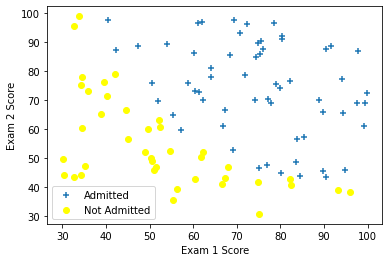

In [47]:
plotData(X, y)

In [48]:
print(sigmoid(np.array([5, 6, 7])))

[0.99330715 0.99752738 0.99908895]


In [49]:
m, n = X.shape
print(m, n)

100 2


In [50]:
intercept = pd.DataFrame(np.ones(m), columns=['intercept'])
X = intercept.merge(X, how='left', left_index=True, right_index=True)
X.head()

,intercept,Exam1Score,Exam2Score
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [51]:
initial_theta = np.zeros(n+1, dtype=object)
initial_theta

array([0, 0, 0], dtype=object)

In [52]:
X = np.matrix(X, dtype=object)
X

matrix([[1.0, 34.62365962451697, 78.0246928153624],
        [1.0, 30.28671076822607, 43.89499752400101],
        [1.0, 35.84740876993872, 72.90219802708364],
        [1.0, 60.18259938620976, 86.30855209546826],
        [1.0, 79.0327360507101, 75.3443764369103],
        [1.0, 45.08327747668339, 56.3163717815305],
        [1.0, 61.10666453684766, 96.51142588489624],
        [1.0, 75.02474556738889, 46.55401354116538],
        [1.0, 76.09878670226257, 87.42056971926803],
        [1.0, 84.43281996120035, 43.53339331072109],
        [1.0, 95.86155507093572, 38.22527805795094],
        [1.0, 75.01365838958247, 30.60326323428011],
        [1.0, 82.30705337399482, 76.48196330235604],
        [1.0, 69.36458875970939, 97.71869196188608],
        [1.0, 39.53833914367223, 76.03681085115882],
        [1.0, 53.9710521485623, 89.20735013750205],
        [1.0, 69.07014406283025, 52.74046973016765],
        [1.0, 67.94685547711617, 46.67857410673128],
        [1.0, 70.66150955499435, 92.92713789364832]

In [53]:
y = np.matrix(y, dtype=object)
y = np.transpose(y)
y

matrix([[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],

In [54]:
cost= costFunction(initial_theta, X, y)
grad = gradientFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f' % cost)
print('Gradient: ', grad)

Cost at initial theta (zeros): 0.693147
Gradient:  [[-0.1]
 [-12.00921658929115]
 [-11.262842205513591]]


In [55]:
test_theta = np.array([-24, 0.2, 0.2])
cost = costFunction(test_theta, X, y)
grad = gradientFunction(initial_theta, X, y)

In [56]:
print('Cost at initial theta (zeros): %f' % cost)
print('Gradient: ', grad)

Cost at initial theta (zeros): 0.218330
Gradient:  [[-0.1]
 [-12.00921658929115]
 [-11.262842205513591]]


In [57]:
import scipy.optimize as op
opt, cost = op.fmin_ncg(f=costFunction, x0=initial_theta, fprime=gradientFunction, args=(X, y))

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method